In [13]:
import numpy as np
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage import data
from scipy import ndimage
import matplotlib.pyplot as plt
from utility import segmentation_utils

image = cv.imread('orange.jpg')
image_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

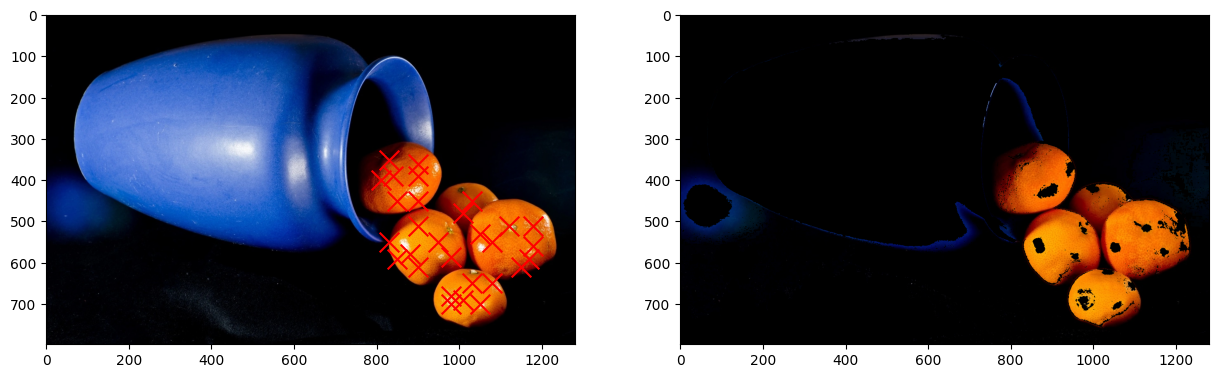

In [14]:
seeds = [(400, 810), (390, 900), (550, 950), (970, 540),(510, 900),(585, 980), (480, 1010), (550, 1080), (560, 1180), (700, 1050),(530,1050),(510,1180),(700,980),(690,1010),(610,900),(450,850),(450,1030),(510,1120),(590,850),(580,880),(650,1030),(610,1150),(450,900),(360,900),(350,830),(390,840),(680,980),(550,830),(590,1170),(650,1080)]

x = list(map(lambda x: x[1], seeds))
y = list(map(lambda x: x[0], seeds))

threshold = 115

segmented_region = segmentation_utils.region_growingHSV(image_hsv, seeds, threshold)

result = cv.bitwise_and(image, image, mask=segmented_region)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.scatter(x, y, marker="x", color="red", s=200)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.show()